# **Initial EDA and Visualisation on Natural Disasters Dataset**

In [1]:
import sys
!{sys.executable} -m pip install geopandas


[notice] A new release of pip is available: 25.0 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
pip install geopy

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.0 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
import pandas as pd
import numpy as np
import matplotlib as plt
import seaborn as sns
import time
import geopandas as gpd
from geopy.geocoders import Nominatim
from geopy.exc import GeocoderTimedOut, GeocoderServiceError
from thefuzz import process

In [4]:
# Load cleaned natural disasters dataset
natural_disasters = pd.read_csv(r"C:\Users\riyas\OneDrive - University of Birmingham\Documents\MSc Data Science\2. group project data science\cleaned datasets\cleaned_natural_disasters.csv")

print(natural_disasters.head())

natural_disasters

          DisNo. Classification Key Disaster Group    Disaster Subgroup  \
0  1900-0003-USA    nat-met-sto-tro        Natural       Meteorological   
1  1900-0005-USA    tec-ind-fir-fir  Technological  Industrial accident   
2  1900-0006-JAM    nat-hyd-flo-flo        Natural         Hydrological   
3  1900-0007-JAM    nat-bio-epi-vir        Natural           Biological   
4  1900-0008-JPN    nat-geo-vol-ash        Natural          Geophysical   

       Disaster Type   Disaster Subtype       Event Name  ISO        Country  \
0              Storm   Tropical cyclone          Unknown  USA  United States   
1  Fire (Industrial)  Fire (Industrial)          Unknown  USA  United States   
2              Flood    Flood (General)          Unknown  JAM        Jamaica   
3           Epidemic      Viral disease  Gastroenteritis  JAM        Jamaica   
4  Volcanic activity           Ash fall          Unknown  JPN          Japan   

                         Subregion    Region                  Locati

DisNo. Classification Key Disaster Group    Disaster Subgroup  \
0      1900-0003-USA    nat-met-sto-tro        Natural       Meteorological   
1      1900-0005-USA    tec-ind-fir-fir  Technological  Industrial accident   
2      1900-0006-JAM    nat-hyd-flo-flo        Natural         Hydrological   
3      1900-0007-JAM    nat-bio-epi-vir        Natural           Biological   
4      1900-0008-JPN    nat-geo-vol-ash        Natural          Geophysical   
...              ...                ...            ...                  ...   
26909  2024-9277-VNM    nat-cli-dro-dro        Natural       Climatological   
26910  2024-9338-NAM    nat-cli-dro-dro        Natural       Climatological   
26911  2024-9381-GRD    nat-cli-dro-dro        Natural       Climatological   
26912  2024-9592-AGO    nat-cli-dro-dro        Natural       Climatological   
26913  2024-9796-USA    nat-cli-dro-dro        Natural       Climatological   

           Disaster Type   Disaster Subtype       Event Name  ISO  \
0                  Storm   Tropical cyclone          Unknown  USA   
1      Fire (Industrial)  Fire (Industrial)          Unknown  USA   
2                  Flood    Flood (General)          Unknown  JAM   
3               Epidemic      Viral disease  Gastroenteritis  JAM   
4      Volcanic activity           Ash fall          Unknown  JPN   
...                  ...                ...              ...  ...   
26909            Drought            Drought          Unknown  VNM   
26910            Drought            Drought          Unknown  NAM   
26911            Drought            Drought          Unknown  GRD   
26912            Drought            Drought          Unknown  AGO   
26913            Drought            Drought          Unknown  USA   

             Country                        Subregion    Region  \
0      United States                 Northern America  Americas   
1      United States                 Northern America  Americas   
2            Jamaica  Latin America and the Caribbean  Americas   
3            Jamaica  Latin America and the Caribbean  Americas   
4              Japan                     Eastern Asia      Asia   
...              ...                              ...       ...   
26909        Vietnam               South-eastern Asia      Asia   
26910        Namibia               Sub-Saharan Africa    Africa   
26911        Grenada  Latin America and the Caribbean  Americas   
26912         Angola               Sub-Saharan Africa    Africa   
26913  United States                 Northern America  Americas   

                                                Location   Origin  \
0                                      Galveston (Texas)  Unknown   
1                               Hoboken, New York, Piers  Unknown   
2                                            Saint James  Unknown   
3                                                  Porus  Unknown   
4                                                Unknown  Unknown   
...                                                  ...      ...   
26909  Can Duoc, Can Giuoc areas (Long An province); ...  Unknown   
26910  Khomas, Ohangwena, Kavango West, Kunene, and K...  El Nino   
26911            Saint Andrew, Saint David, Saint George  Unknown   
26912                                            Unknown  El Nino   
26913  Texas, Oklahoma, Kansas, Montana, Idaho, Washi...  Unknown   

                   Associated Types   Latitude   Longitude  Start Date  \
0          Avalanche (Snow, Debris)  19.432800  104.125000  08/09/1900   
1                         Explosion  38.820809  -96.331617  30/06/1900   
2                           Unknown  15.100000   36.720000  06/01/1900   
3                           Unknown  18.122079  -77.303589  13/01/1900   
4                           Unknown   3.170000   22.102000  07/07/1900   
...                             ...        ...         ...         ...   
26909                       Unknown  16.517347  105.913388  01/01/2024   
26910  Foo

In [5]:
# Basic statistics
print(natural_disasters.describe())

           Latitude     Longitude
count  26914.000000  26914.000000
mean      18.273961     46.109321
std       17.338014     59.217273
min      -72.640000   -178.252000
25%       13.662228     22.100000
50%       19.432800     36.720000
75%       26.605170    104.125000
max       67.930000    179.650000


In [6]:
# More descriptive stats on all columns
print(natural_disasters.describe(include='all'))

               DisNo. Classification Key Disaster Group Disaster Subgroup  \
count           26914              26914          26914             26914   
unique          26914                 67              2                 9   
top     2024-9796-USA    tec-tra-roa-roa        Natural      Hydrological   
freq                1               2936          17331              6878   
mean              NaN                NaN            NaN               NaN   
std               NaN                NaN            NaN               NaN   
min               NaN                NaN            NaN               NaN   
25%               NaN                NaN            NaN               NaN   
50%               NaN                NaN            NaN               NaN   
75%               NaN                NaN            NaN               NaN   
max               NaN                NaN            NaN               NaN   

       Disaster Type Disaster Subtype Event Name    ISO Country  \
count   

In [7]:
# Frequency Counts: Examine the distribution of categorical variables.

print(natural_disasters['Disaster Type'].value_counts())


Disaster Type
Flood                               6029
Storm                               4874
Road                                2936
Water                               1675
Earthquake                          1625
Epidemic                            1508
Air                                 1096
Mass movement (wet)                  849
Drought                              826
Fire (Miscellaneous)                 821
Explosion (Industrial)               792
Extreme temperature                  699
Rail                                 647
Wildfire                             492
Collapse (Miscellaneous)             310
Miscellaneous accident (General)     281
Volcanic activity                    280
Explosion (Miscellaneous)            225
Fire (Industrial)                    221
Collapse (Industrial)                188
Industrial accident (General)        126
Chemical spill                       108
Infestation                           95
Poisoning                             77
Ga

In [8]:
print(natural_disasters['Region'].value_counts())

Region
Asia        11098
Americas     5942
Africa       5696
Europe       3399
Oceania       779
Name: count, dtype: int64


In [9]:
print(natural_disasters['Country'].value_counts())

Country
China               2201
India               1603
United States       1549
Philippines          955
Indonesia            894
                    ... 
Saint Barthelemy       1
Saint Martin           1
Sint Maarten           1
Curacao                1
Liechtenstein          1
Name: count, Length: 217, dtype: int64


In [10]:
print(natural_disasters['Disaster Subtype'].value_counts())

Disaster Subtype
Road                       2936
Riverine flood             2641
Tropical cyclone           2597
Flood (General)            2444
Water                      1675
                           ... 
Sudden Subsidence (dry)       1
Collision                     1
Sudden Subsidence (wet)       1
Animal incident               1
Lahar                         1
Name: count, Length: 67, dtype: int64


In [11]:
# Convert 'Start Date' to datetime for time-based analysis
natural_disasters['Start Date'] = pd.to_datetime(natural_disasters['Start Date'], errors='coerce')

# Number of disasters per year
natural_disasters['Year'] = natural_disasters['Start Date'].dt.year
disasters_per_year = natural_disasters['Year'].value_counts().sort_index()

disasters_per_year


Year
1900.0      6
1901.0      2
1902.0      5
1903.0      4
1904.0      4
         ... 
2020.0    235
2021.0    250
2022.0    212
2023.0    272
2024.0    211
Name: count, Length: 123, dtype: int64

# Data Visualization

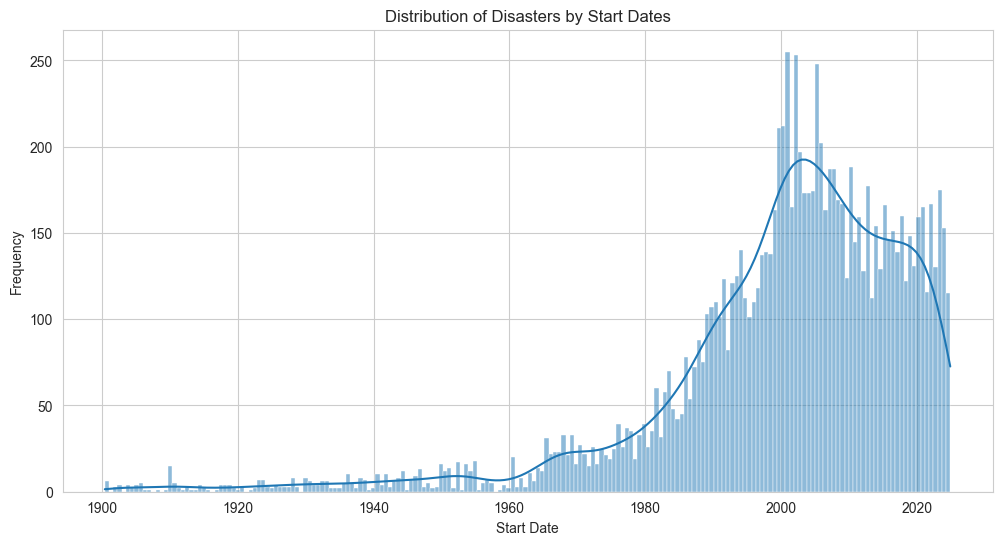

In [12]:
# Histograms: To visualize the distribution of numerical data

import matplotlib.pyplot as plt
import seaborn as sns

# Set the aesthetic style of the plots.
sns.set_style("whitegrid")

# Creating a histogram for the 'Start Year'
plt.figure(figsize=(12, 6))
sns.histplot(natural_disasters['Start Date'], bins=200, kde=True)  # Adjust bins as needed
plt.title('Distribution of Disasters by Start Dates')
plt.xlabel('Start Date')
plt.ylabel('Frequency')
plt.show()

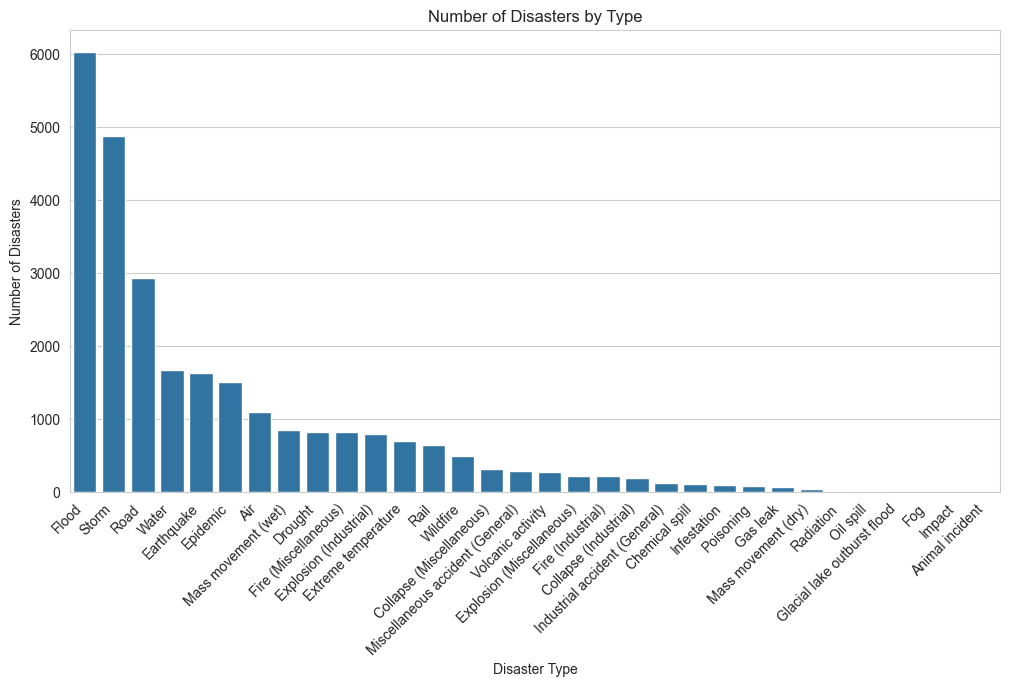

In [13]:
# Bar Charts: To visualize the frequency of categorical data.

plt.figure(figsize=(12, 6))
disaster_counts = natural_disasters['Disaster Type'].value_counts()
sns.barplot(x=disaster_counts.index, y=disaster_counts.values)
plt.title('Number of Disasters by Type')
plt.xlabel('Disaster Type')
plt.ylabel('Number of Disasters')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for readability

plt.show()

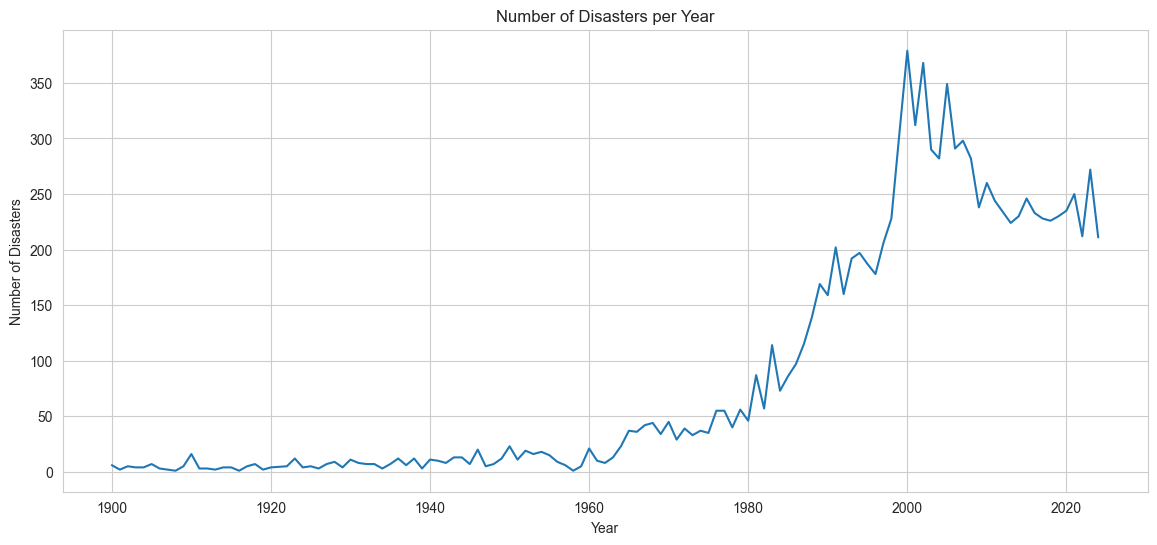

In [14]:
# Time Series of Disaster Occurrences:
#   Visualization: Line chart of the number of disasters per year (or month, quarter).
#   Analysis: Identifies overall trends (increasing/decreasing disaster frequency), seasonality, and major peaks/dips. 
#   Look for potential explanations for any major shifts (e.g., improved reporting, climate change effects).
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Ensure 'Start Date' is datetime
natural_disasters['Start Date'] = pd.to_datetime(natural_disasters['Start Date'], format='%d/%m/%Y', errors='coerce')
natural_disasters['Year'] = natural_disasters['Start Date'].dt.year

# Aggregate disasters by year
disasters_per_year = natural_disasters['Year'].value_counts().sort_index()

# Create the time series plot
plt.figure(figsize=(14, 6))
sns.lineplot(x=disasters_per_year.index, y=disasters_per_year.values)
plt.title('Number of Disasters per Year')
plt.xlabel('Year')
plt.ylabel('Number of Disasters')
plt.show()



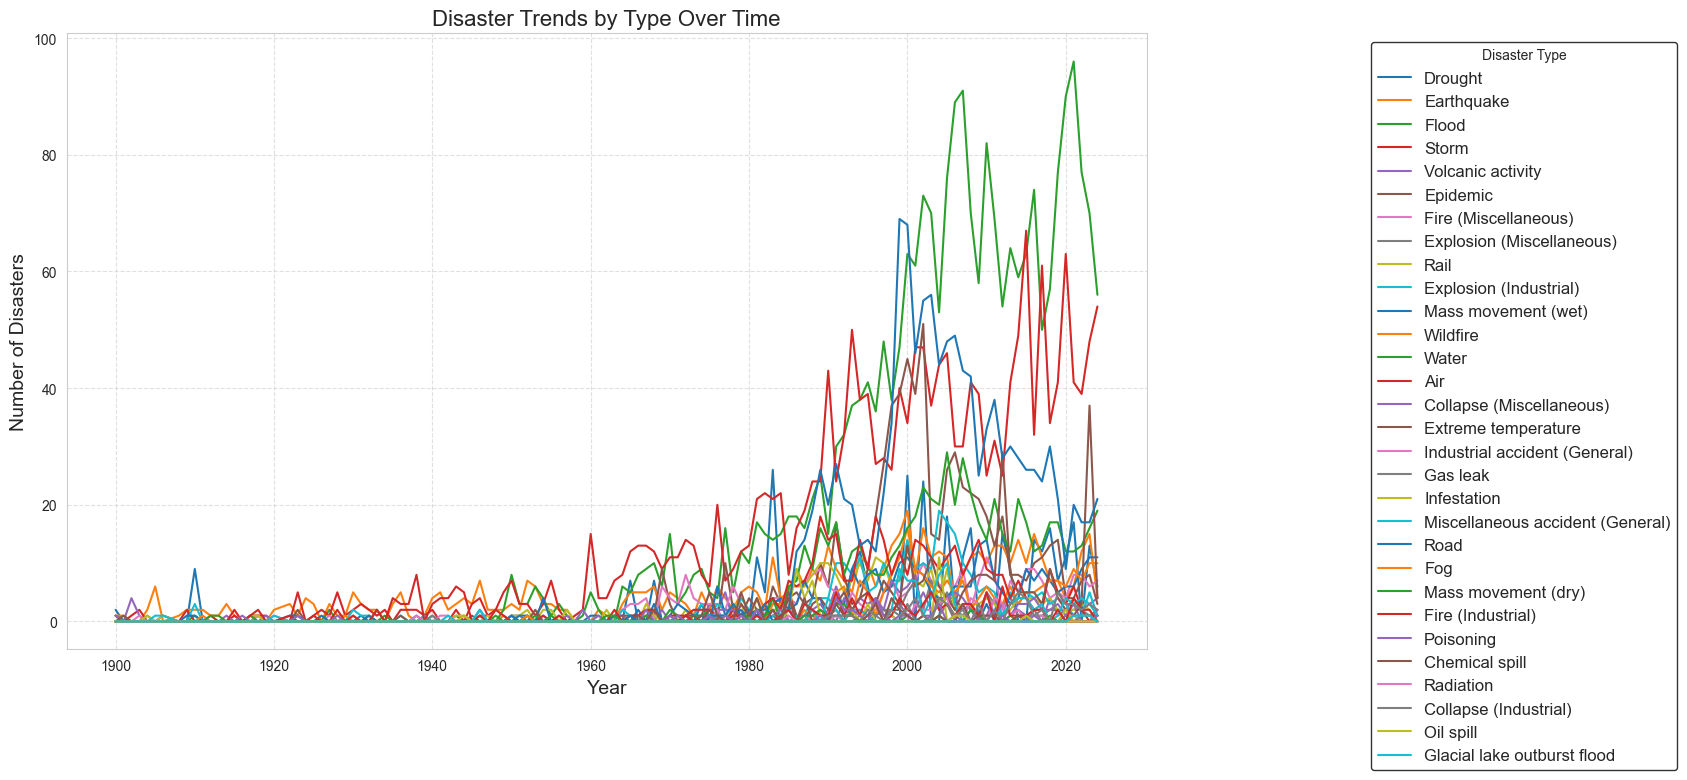

In [15]:
# Trends by Disaster Type Over Time:
#   Visualization: Stacked area chart or multiple line charts showing the number of occurrences for different disaster types over time
#   e.g. (Earthquake, Flood, Storm, etc.)
#   Analysis: Reveals whether certain disaster types are becoming more or less frequent.

import matplotlib.pyplot as plt

# Group by year and disaster type, then count occurrences 
disaster_trends = natural_disasters.groupby(['Year', 'Disaster Type']).size().unstack(fill_value=0)

# Create a larger figure
fig, ax = plt.subplots(figsize=(16, 8))  # Ensures a large, detailed graph

# Plotting the trends
disaster_trends.plot(kind='line', stacked=False, ax=ax)  # Use 'ax' to keep control

# Add titles and labels
ax.set_title('Disaster Trends by Type Over Time', fontsize=16)
ax.set_xlabel('Year', fontsize=14)
ax.set_ylabel('Number of Disasters', fontsize=14)

# Move legend to the right without shrinking the graph
legend = ax.legend(title='Disaster Type', bbox_to_anchor=(1.2, 1), loc='upper left', fontsize=12)
legend.get_frame().set_edgecolor('black')  # Optional: Add a border around the legend

# Add grid for better visibility
ax.grid(True, linestyle="--", alpha=0.6)

# Adjust layout so nothing is cut off
plt.subplots_adjust(right=0.8)  # Moves graph slightly left to fit legend

plt.show()


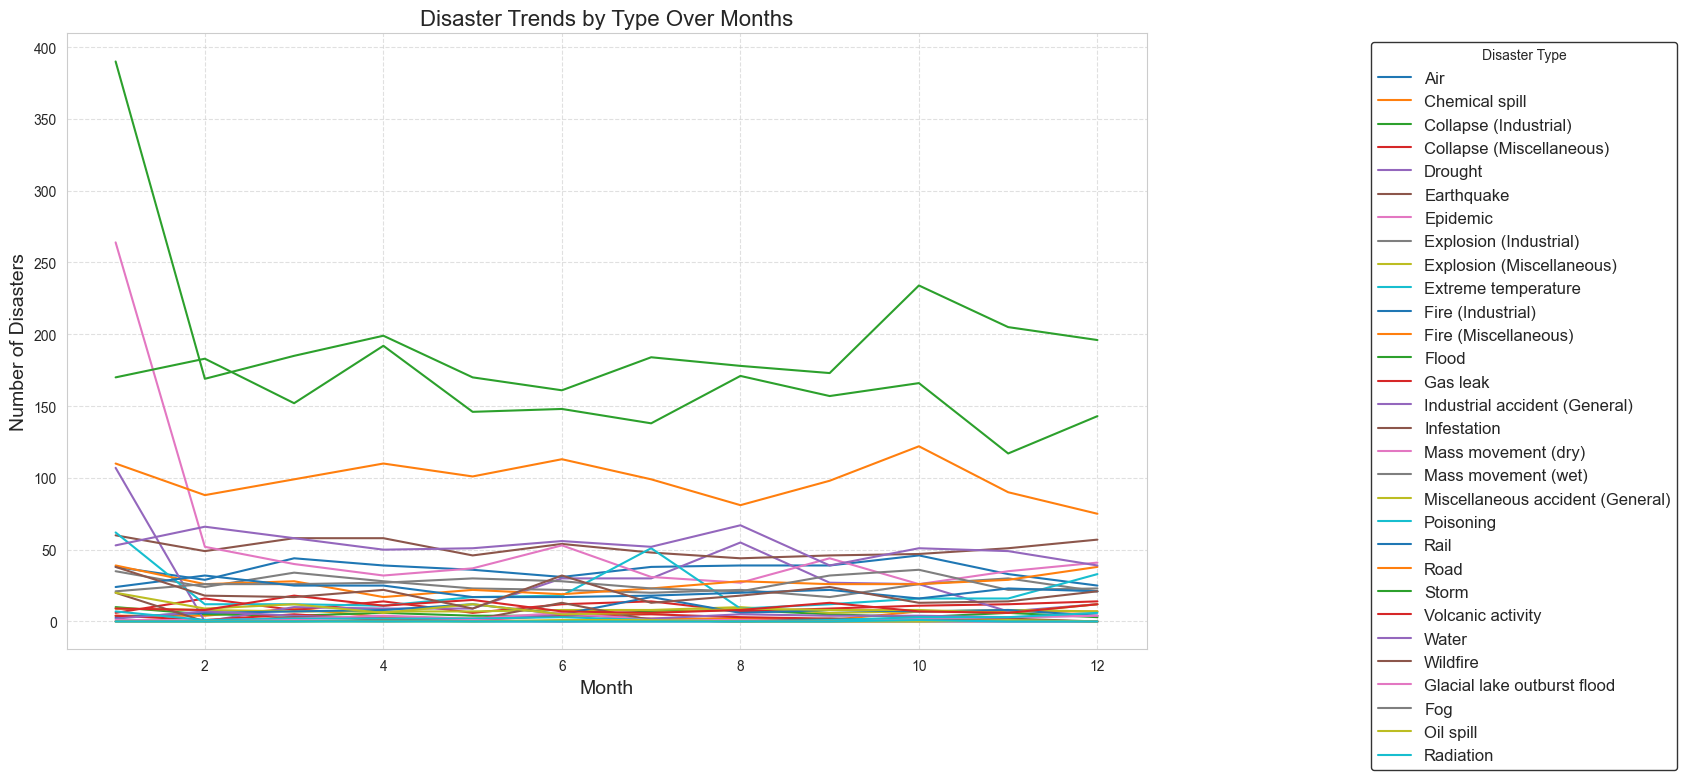

In [16]:
# Seasonal Analysis:

# Visualization: Box plots or line charts showing the distribution of disaster occurrences by month.
# Analysis: Identifies months with higher disaster activity, which is particularly relevant for weather-related disasters.

import matplotlib.pyplot as plt

# Ensure 'Month' column is extracted correctly
natural_disasters['Month'] = natural_disasters['Start Date'].dt.month

# Group by month and disaster type, then count occurrences
monthly_disasters = natural_disasters.groupby(['Month', 'Disaster Type']).size().unstack(fill_value=0)

# Create a larger figure
fig, ax = plt.subplots(figsize=(16, 8))  # Ensures a large, detailed graph

# Plotting the trends
monthly_disasters.plot(kind='line', ax=ax)  # Use 'ax' for better control

# Add titles and labels
ax.set_title('Disaster Trends by Type Over Months', fontsize=16)
ax.set_xlabel('Month', fontsize=14)
ax.set_ylabel('Number of Disasters', fontsize=14)

# Move legend to the right without shrinking the graph
legend = ax.legend(title='Disaster Type', bbox_to_anchor=(1.2, 1), loc='upper left', fontsize=12)
legend.get_frame().set_edgecolor('black')  # Optional: Add a border around the legend

# Add grid for better visibility
ax.grid(True, linestyle="--", alpha=0.6)

# Adjust layout so nothing is cut off
plt.subplots_adjust(right=0.8)  # Moves graph slightly left to fit legend

plt.show()

In [17]:
pip install plotly plotly_express==0.4.0


[notice] A new release of pip is available: 25.0 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [18]:
pip install nbformat


[notice] A new release of pip is available: 25.0 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [19]:
import plotly.express as px

# Aggregate disaster counts by country
country_disaster_counts = natural_disasters['Country'].value_counts().reset_index()
country_disaster_counts.columns = ['Country', 'Disaster Count']

# Create the choropleth map
fig = px.choropleth(country_disaster_counts,
                    locations='Country',
                    locationmode='country names',
                    color='Disaster Count',
                    title='Number of Disasters by Country')
fig.show()

- 5 natural disasters (filtering by most common type that affects bird migration)
    - floods
    - storms
    - wildfire 

In [20]:
import pandas as pd
import plotly.express as px

# Filter for the top 5 disaster types
top_disaster_types = ['Flood', 'Storm', 'Road', 'Water', 'Earthquake']
filtered_df = natural_disasters[natural_disasters['Disaster Type'].isin(top_disaster_types)]

# Drop rows with missing coordinate data
plot_data = filtered_df[['Latitude', 'Longitude', 'Disaster Type']].dropna()

# Create the interactive map
fig = px.scatter_geo(
    plot_data,
    lat='Latitude',
    lon='Longitude',
    color='Disaster Type',
    title='Global Distribution of Top 5 Most Frequent Natural Disaster Types',
    opacity=0.6,
    template='plotly_white',
    height=700
)

fig.update_geos(
    showcountries=True,
    showcoastlines=True,
    showland=True,
    fitbounds="locations"
)

fig.show()


In [21]:
import pandas as pd
import plotly.express as px

# Filter for Europe
europe_df = natural_disasters[natural_disasters['Region'] == 'Europe'].dropna(subset=['Latitude', 'Longitude'])

# Create Plotly map
fig = px.scatter_geo(
    europe_df,
    lat='Latitude',
    lon='Longitude',
    color='Disaster Type',
    title='Natural Disasters in Europe',
    template='plotly_white',
    opacity=0.6,
    height=700,
    scope='europe'  # Focuses map on Europe
)

fig.update_geos(showcountries=True, showcoastlines=True, showland=True)
fig.show()


In [22]:
import pandas as pd
import plotly.express as px

# Filter for Europe only
europe_df = natural_disasters[natural_disasters['Region'] == 'Europe'].dropna(subset=['Latitude', 'Longitude'])

# Identify top 5 most frequent disaster types in Europe
top5_disasters = europe_df['Disaster Type'].value_counts().head(5).index.tolist()

# Filter to include only top 5 disaster types
filtered_europe_df = europe_df[europe_df['Disaster Type'].isin(top5_disasters)]

# Create interactive map
fig = px.scatter_geo(
    filtered_europe_df,
    lat='Latitude',
    lon='Longitude',
    color='Disaster Type',
    title='Top 5 Most Frequent Natural Disasters in Europe',
    template='plotly_white',
    opacity=0.6,
    height=700,
    scope='europe'  # Focus map on Europe
)

fig.update_geos(showcountries=True, showcoastlines=True, showland=True)
fig.show()


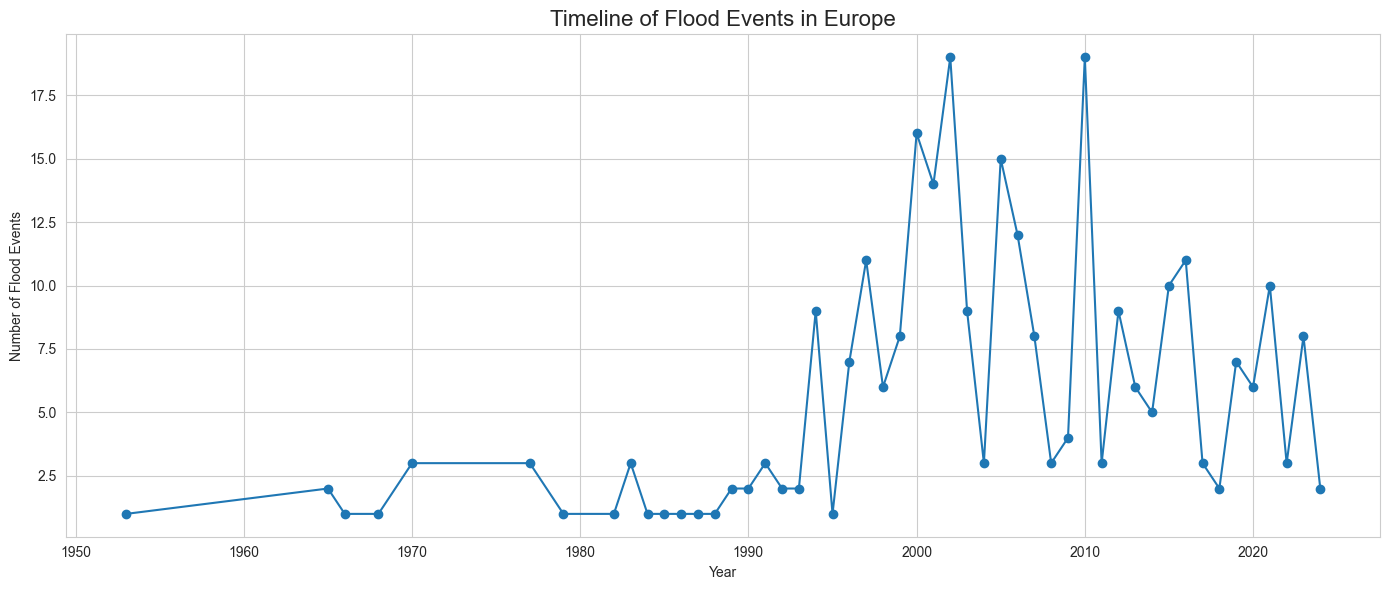

In [23]:
import matplotlib.pyplot as plt

# Filter for floods in Europe
floods_europe = natural_disasters[
    (natural_disasters['Region'] == 'Europe') &
    (natural_disasters['Disaster Type'] == 'Flood')
]

# Count number of flood events per year
floods_per_year = floods_europe['Year'].value_counts().sort_index()

# Plot the timeline
plt.figure(figsize=(14, 6))
plt.plot(floods_per_year.index, floods_per_year.values, marker='o', linestyle='-')
plt.title('Timeline of Flood Events in Europe', fontsize=16)
plt.xlabel('Year')
plt.ylabel('Number of Flood Events')
plt.grid(True)
plt.tight_layout()
plt.show()


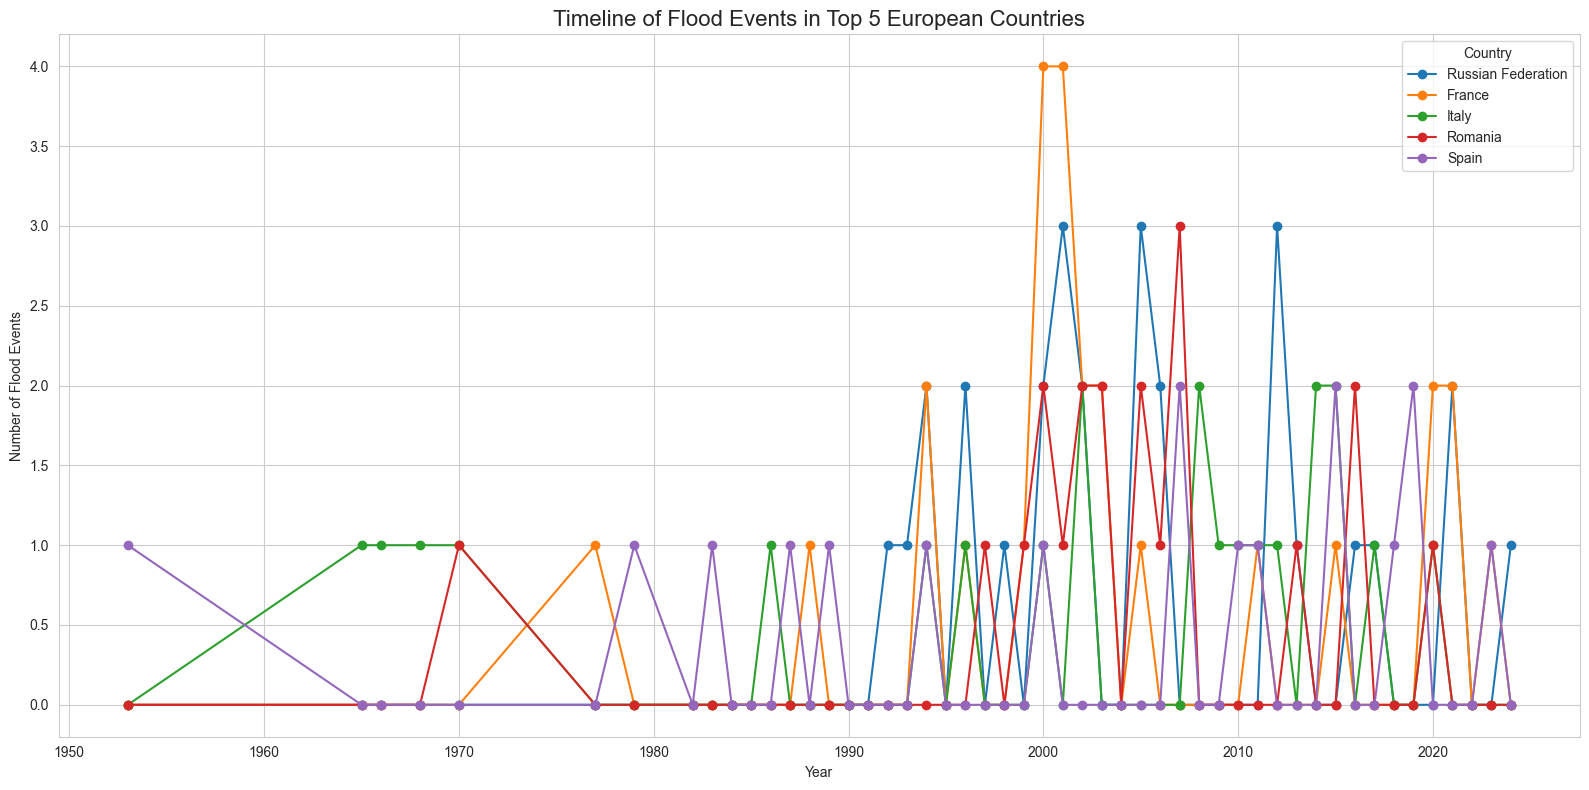

In [24]:
# Group flood events in Europe by year and country
floods_by_country_year = floods_europe.groupby(['Year', 'Country']).size().unstack(fill_value=0)

# Plotting a timeline for multiple countries
plt.figure(figsize=(16, 8))

# Plot top 5 countries with the most flood events overall
top_countries = floods_europe['Country'].value_counts().head(5).index.tolist()
floods_by_country_year[top_countries].plot(ax=plt.gca(), marker='o')

plt.title('Timeline of Flood Events in Top 5 European Countries', fontsize=16)
plt.xlabel('Year')
plt.ylabel('Number of Flood Events')
plt.legend(title='Country')
plt.grid(True)
plt.tight_layout()
plt.show()


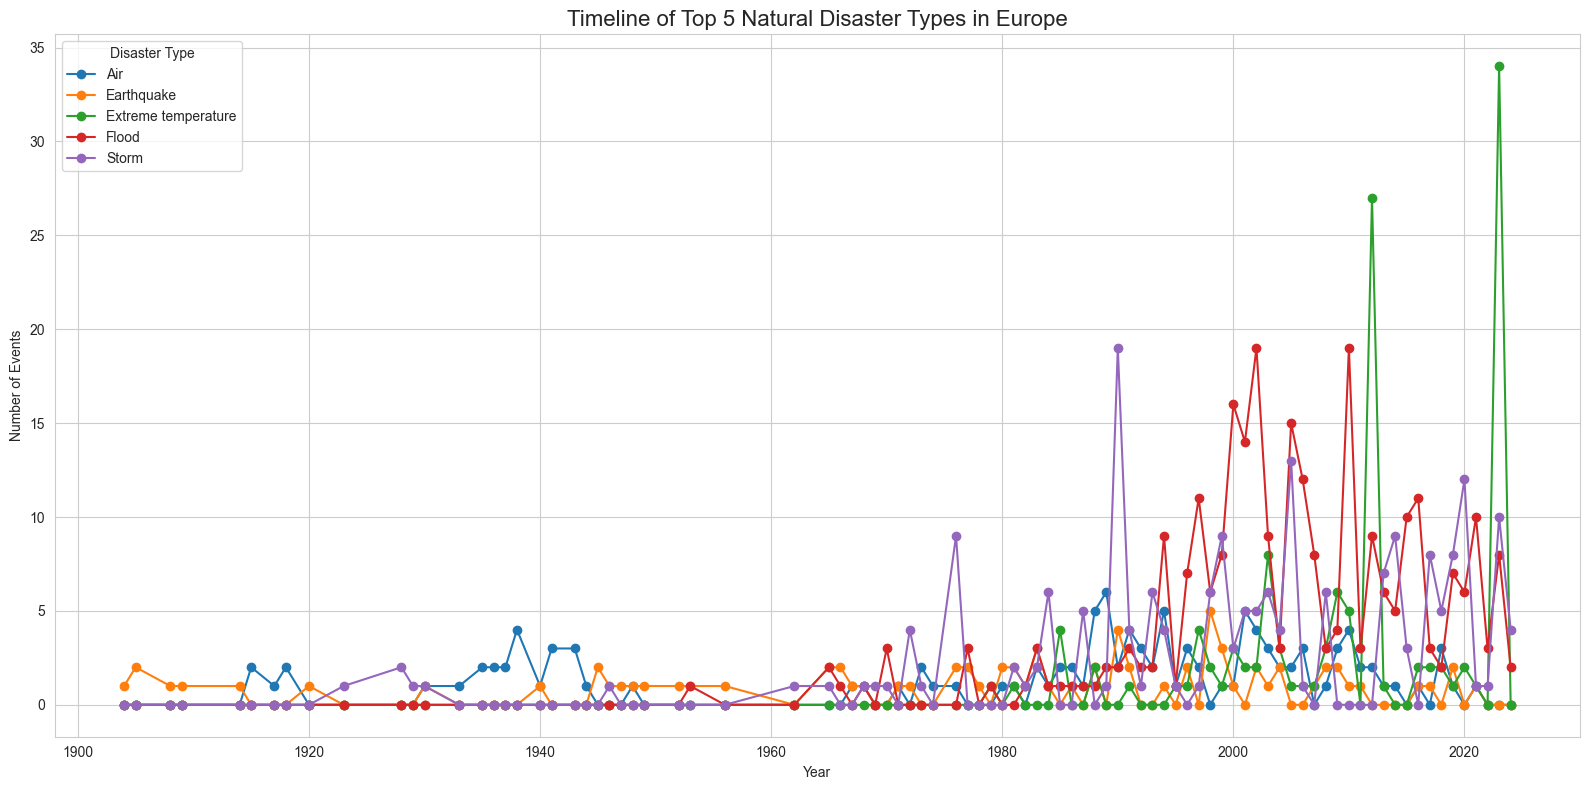

In [25]:
europe_disasters = natural_disasters[natural_disasters['Region'] == 'Europe']

europe_disaster_counts = europe_disasters['Disaster Type'].value_counts()
europe_disaster_counts

# Filter for top 5 disaster types in Europe
top5_disasters_europe = europe_disaster_counts.head(5).index.tolist()
europe_top5 = natural_disasters[
    (natural_disasters['Region'] == 'Europe') &
    (natural_disasters['Disaster Type'].isin(top5_disasters_europe))
]

# Group by year and disaster type
disasters_by_type_year = europe_top5.groupby(['Year', 'Disaster Type']).size().unstack(fill_value=0)

# Plot the timeline
plt.figure(figsize=(16, 8))
disasters_by_type_year.plot(ax=plt.gca(), marker='o')

plt.title('Timeline of Top 5 Natural Disaster Types in Europe', fontsize=16)
plt.xlabel('Year')
plt.ylabel('Number of Events')
plt.legend(title='Disaster Type')
plt.grid(True)
plt.tight_layout()
plt.show()


In [26]:
import plotly.express as px

# Prepare the data for Plotly
europe_top5_plotly = (
    europe_top5.groupby(['Year', 'Disaster Type'])
    .size()
    .reset_index(name='Count')
    .dropna(subset=['Year'])
)

# Create the interactive line chart
fig = px.line(
    europe_top5_plotly,
    x='Year',
    y='Count',
    color='Disaster Type',
    markers=True,
    title='Timeline of Top 5 Natural Disaster Types in Europe',
    labels={'Count': 'Number of Events'},
    template='plotly_white',
    height=600
)

fig.update_layout(legend_title_text='Disaster Type')
fig.show()


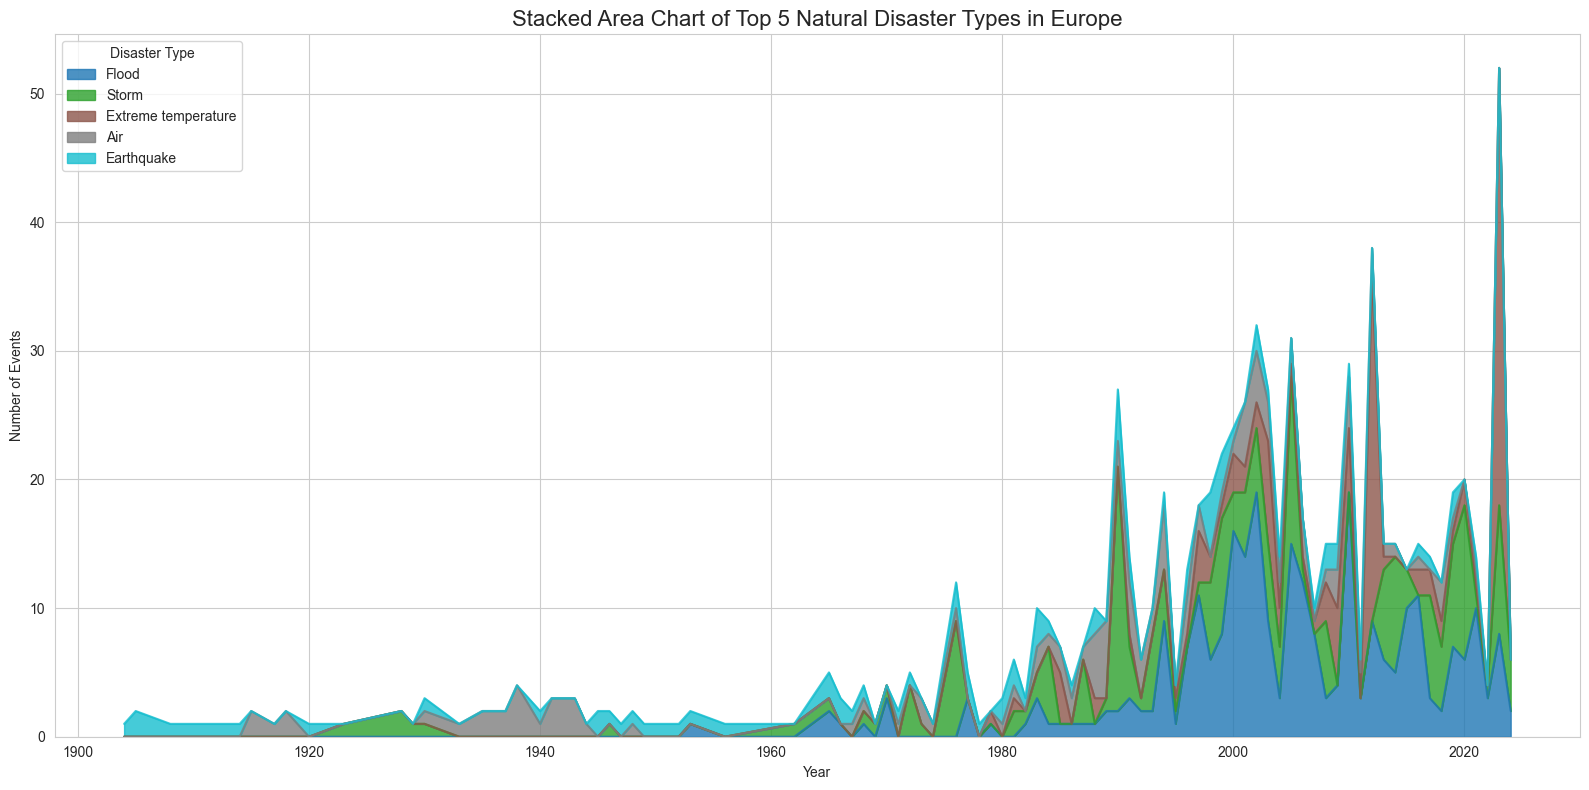

In [27]:
# Create a stacked area chart of top 5 disaster types in Europe over time
plt.figure(figsize=(16, 8))

# Plot as stacked area
disasters_by_type_year[top5_disasters_europe].plot.area(
    ax=plt.gca(),
    colormap='tab10',
    alpha=0.8
)

plt.title('Stacked Area Chart of Top 5 Natural Disaster Types in Europe', fontsize=16)
plt.xlabel('Year')
plt.ylabel('Number of Events')
plt.legend(title='Disaster Type', loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()


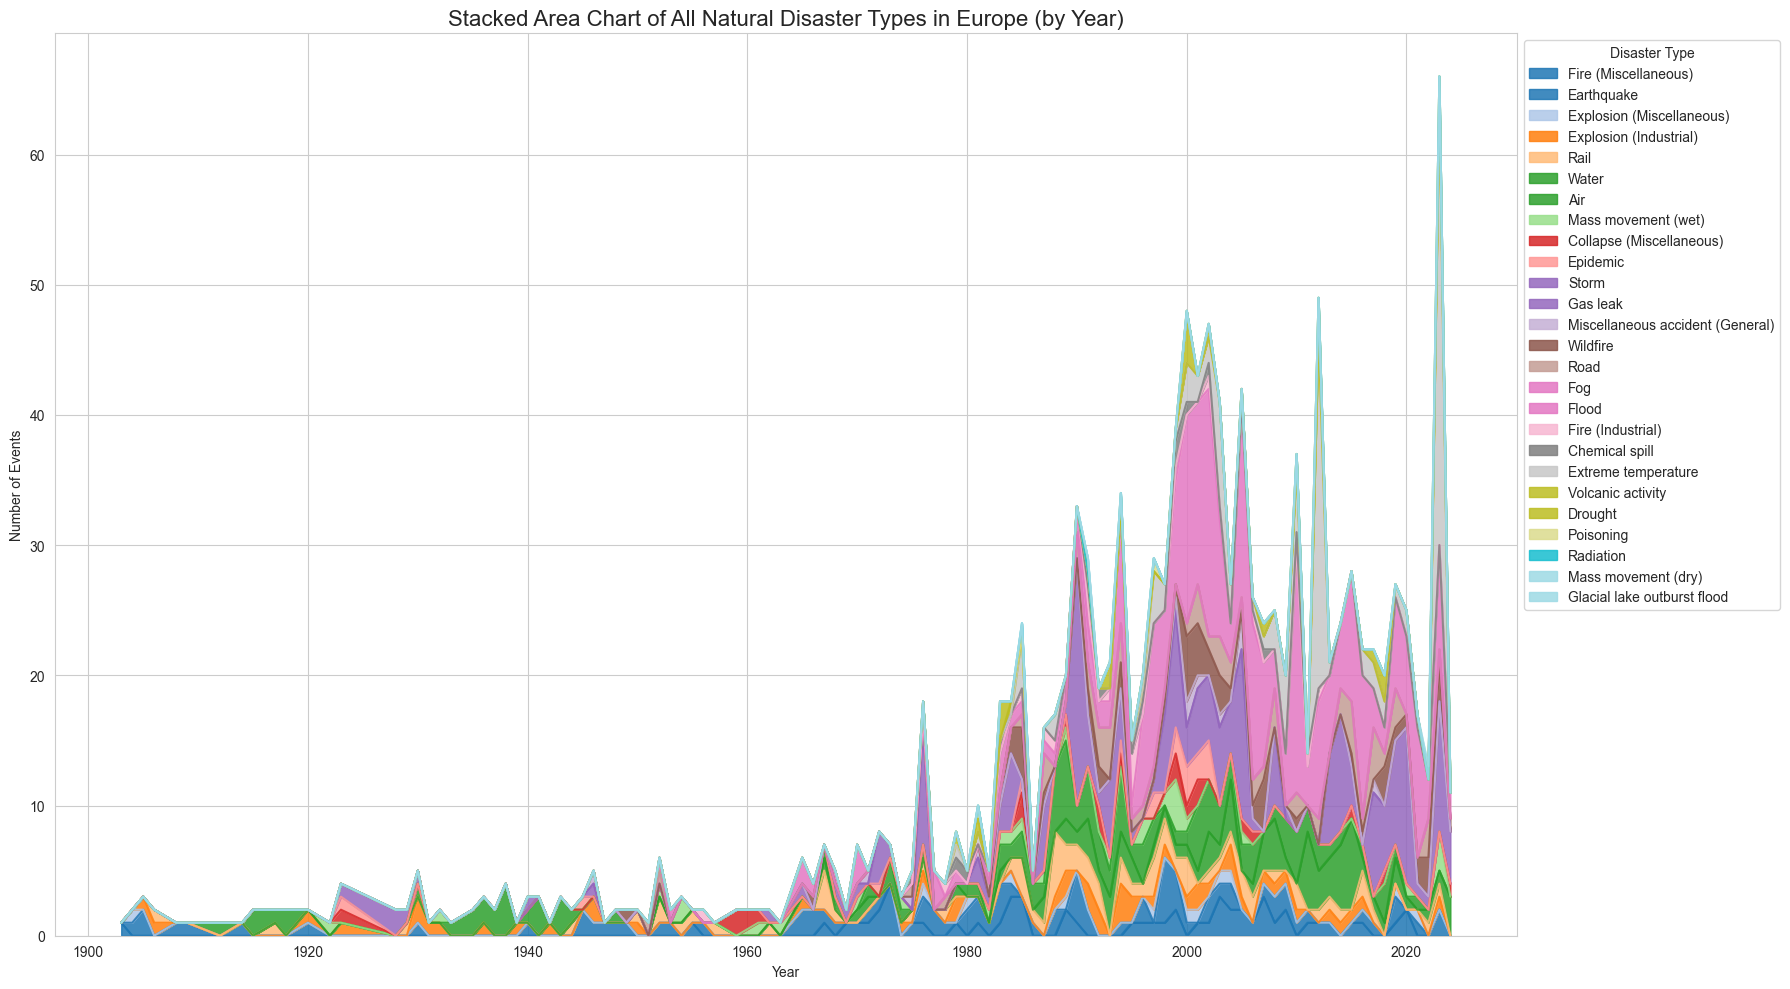

In [28]:
# Group all disaster types in Europe by year
all_disasters_europe = natural_disasters[natural_disasters['Region'] == 'Europe']
disasters_all_by_year = all_disasters_europe.groupby(['Year', 'Disaster Type']).size().unstack(fill_value=0)

# Create a stacked area chart for all disaster types in Europe
plt.figure(figsize=(18, 10))

# Plot as stacked area chart
disasters_all_by_year.plot.area(
    ax=plt.gca(),
    colormap='tab20',
    alpha=0.85
)

plt.title('Stacked Area Chart of All Natural Disaster Types in Europe (by Year)', fontsize=16)
plt.xlabel('Year')
plt.ylabel('Number of Events')
plt.legend(title='Disaster Type', loc='upper left', bbox_to_anchor=(1.0, 1.0))
plt.grid(True)
plt.tight_layout()
plt.show()



In [29]:
import pandas as pd
import plotly.express as px

# Filter for Africa
africa_df = natural_disasters[natural_disasters['Region'] == 'Africa'].dropna(subset=['Latitude', 'Longitude'])

# Create Plotly map
fig = px.scatter_geo(
    africa_df,
    lat='Latitude',
    lon='Longitude',
    color='Disaster Type',
    title='Natural Disasters in Africa',
    template='plotly_white',
    opacity=0.6,
    height=700,
    scope='africa'  # Focuses map on Africa
)

fig.update_geos(showcountries=True, showcoastlines=True, showland=True)
fig.show()


In [30]:
import pandas as pd
import plotly.express as px

# Filter for Africa only
africa_df = natural_disasters[natural_disasters['Region'] == 'Africa'].dropna(subset=['Latitude', 'Longitude'])

# Identify top 5 most frequent disaster types in Africa
top5_disasters_africa = africa_df['Disaster Type'].value_counts().head(5).index.tolist()

# Filter to include only top 5 disaster types
filtered_africa_df = africa_df[africa_df['Disaster Type'].isin(top5_disasters_africa)]

# Create interactive map
fig = px.scatter_geo(
    filtered_africa_df,
    lat='Latitude',
    lon='Longitude',
    color='Disaster Type',
    title='Top 5 Most Frequent Natural Disasters in Africa',
    template='plotly_white',
    opacity=0.6,
    height=700,
    scope='africa'  # Focus map on Africa
)

fig.update_geos(showcountries=True, showcoastlines=True, showland=True)
fig.show()


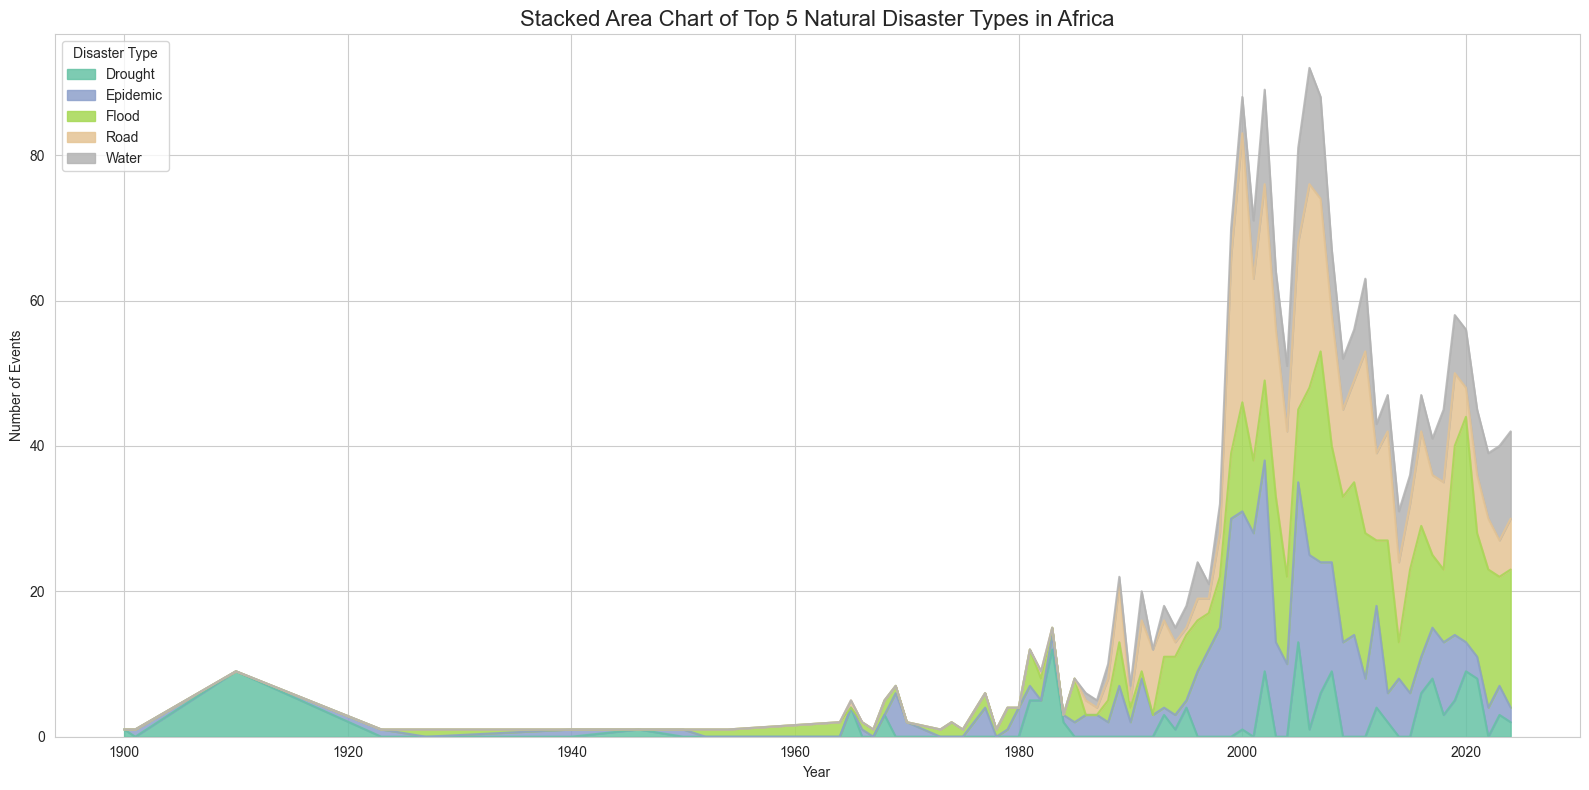

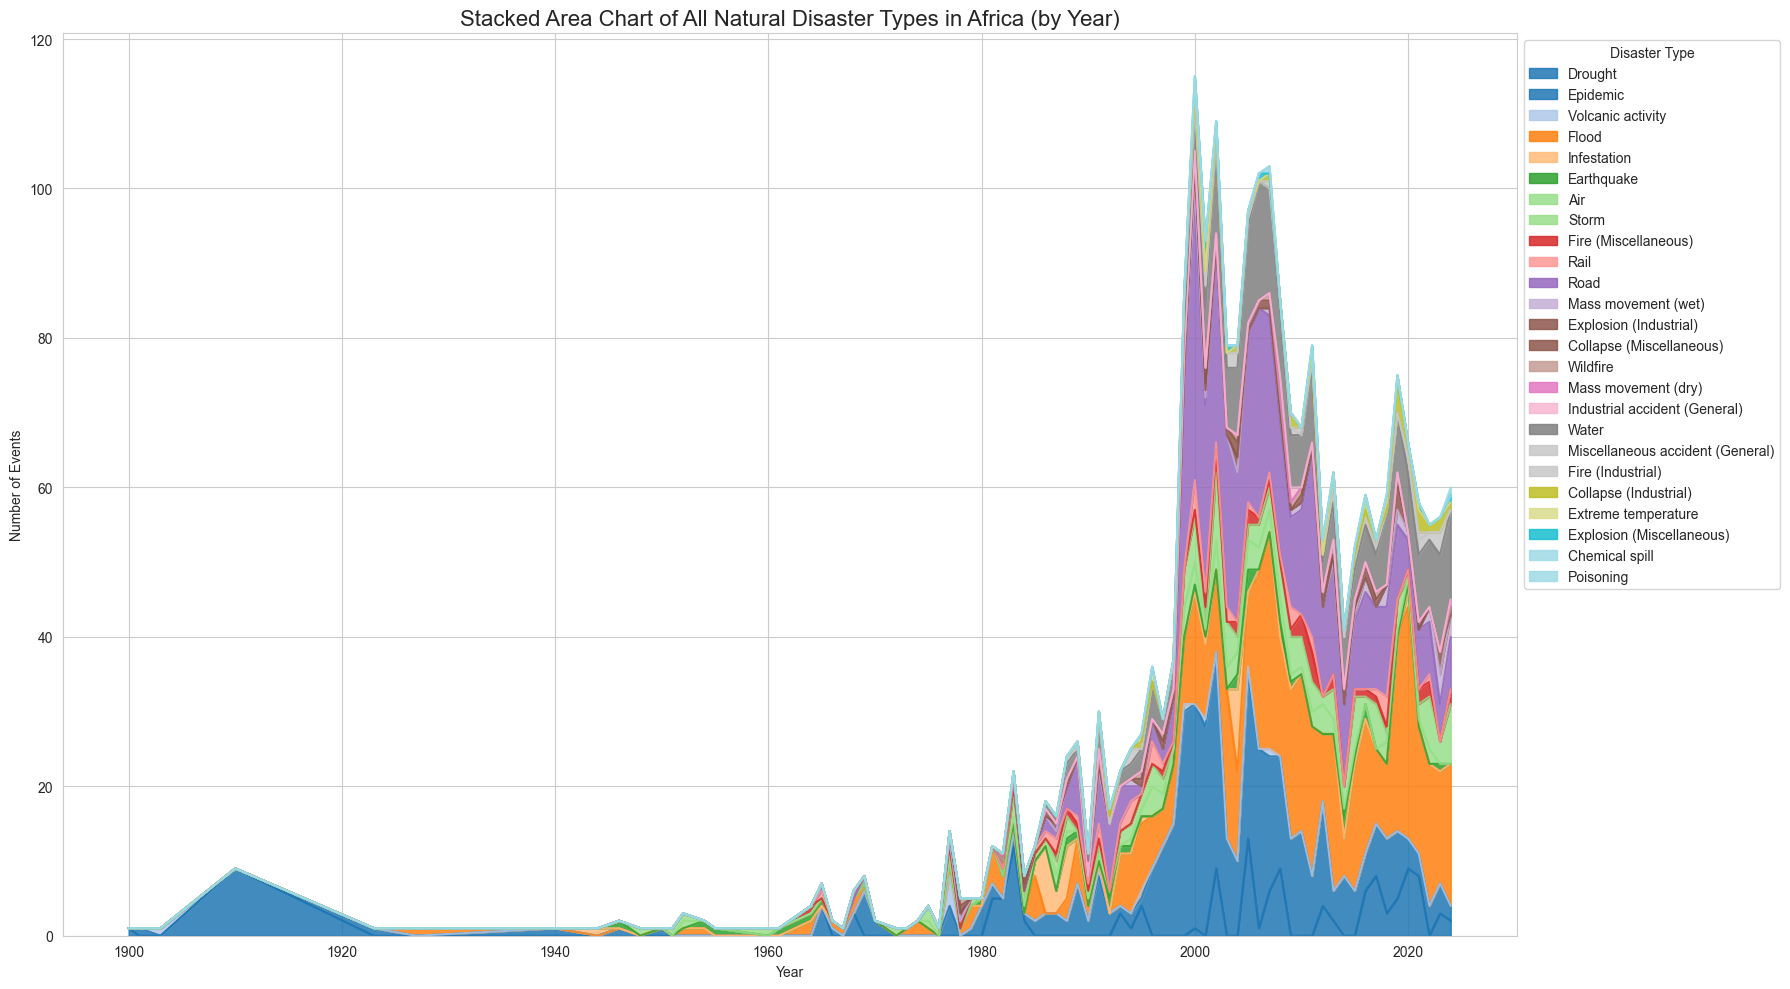

In [31]:
# Filter Africa-related disasters
africa_disasters = natural_disasters[natural_disasters['Region'] == 'Africa']

# Identify top 5 most frequent disaster types in Africa
top5_disasters_africa = africa_disasters['Disaster Type'].value_counts().head(5).index.tolist()

# --- Chart 1: Top 5 Natural Disasters in Africa (Stacked Area Chart) ---
top5_africa = africa_disasters[africa_disasters['Disaster Type'].isin(top5_disasters_africa)]
disasters_top5_africa_year = top5_africa.groupby(['Year', 'Disaster Type']).size().unstack(fill_value=0)

plt.figure(figsize=(16, 8))
disasters_top5_africa_year.plot.area(
    ax=plt.gca(),
    colormap='Set2',
    alpha=0.85
)
plt.title('Stacked Area Chart of Top 5 Natural Disaster Types in Africa', fontsize=16)
plt.xlabel('Year')
plt.ylabel('Number of Events')
plt.legend(title='Disaster Type', loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()

# --- Chart 2: All Natural Disasters in Africa (Stacked Area Chart) ---
disasters_all_africa_year = africa_disasters.groupby(['Year', 'Disaster Type']).size().unstack(fill_value=0)

plt.figure(figsize=(18, 10))
disasters_all_africa_year.plot.area(
    ax=plt.gca(),
    colormap='tab20',
    alpha=0.85
)
plt.title('Stacked Area Chart of All Natural Disaster Types in Africa (by Year)', fontsize=16)
plt.xlabel('Year')
plt.ylabel('Number of Events')
plt.legend(title='Disaster Type', loc='upper left', bbox_to_anchor=(1.0, 1.0))
plt.grid(True)
plt.tight_layout()
plt.show()


In [32]:
import pandas as pd
import plotly.express as px

# Filter for Asia
asia_df = natural_disasters[natural_disasters['Region'] == 'Asia'].dropna(subset=['Latitude', 'Longitude'])

# Identify the top 5 most frequent disaster types in Asia
top5_disasters_asia = asia_df['Disaster Type'].value_counts().head(5).index.tolist()

# Filter for just the top 5 types
filtered_asia_df = asia_df[asia_df['Disaster Type'].isin(top5_disasters_asia)]

# Create interactive map
fig = px.scatter_geo(
    filtered_asia_df,
    lat='Latitude',
    lon='Longitude',
    color='Disaster Type',
    title='Top 5 Most Frequent Natural Disasters in Asia',
    template='plotly_white',
    opacity=0.6,
    height=700,
    scope='asia'
)

fig.update_geos(showcountries=True, showcoastlines=True, showland=True)
fig.show()


In [33]:
import pandas as pd
import plotly.express as px

# Filter for Asia only and drop missing coordinates
asia_df = natural_disasters[natural_disasters['Region'] == 'Asia'].dropna(subset=['Latitude', 'Longitude'])

# Create interactive map for all disasters
fig = px.scatter_geo(
    asia_df,
    lat='Latitude',
    lon='Longitude',
    color='Disaster Type',
    title='All Recorded Natural Disasters in Asia',
    template='plotly_white',
    opacity=0.6,
    height=700,
    scope='asia'
)

fig.update_geos(showcountries=True, showcoastlines=True, showland=True)
fig.show()


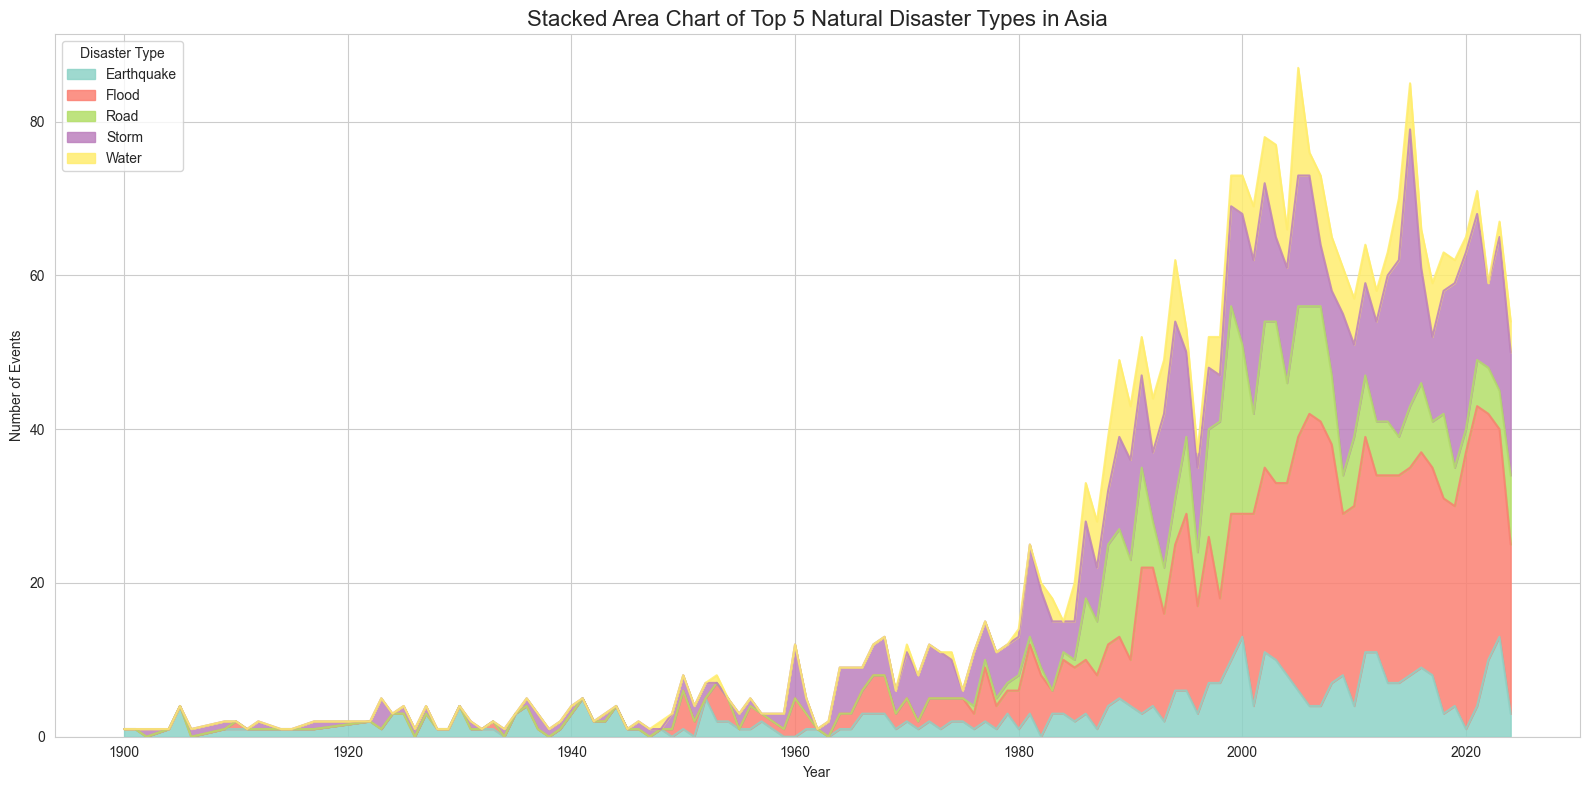

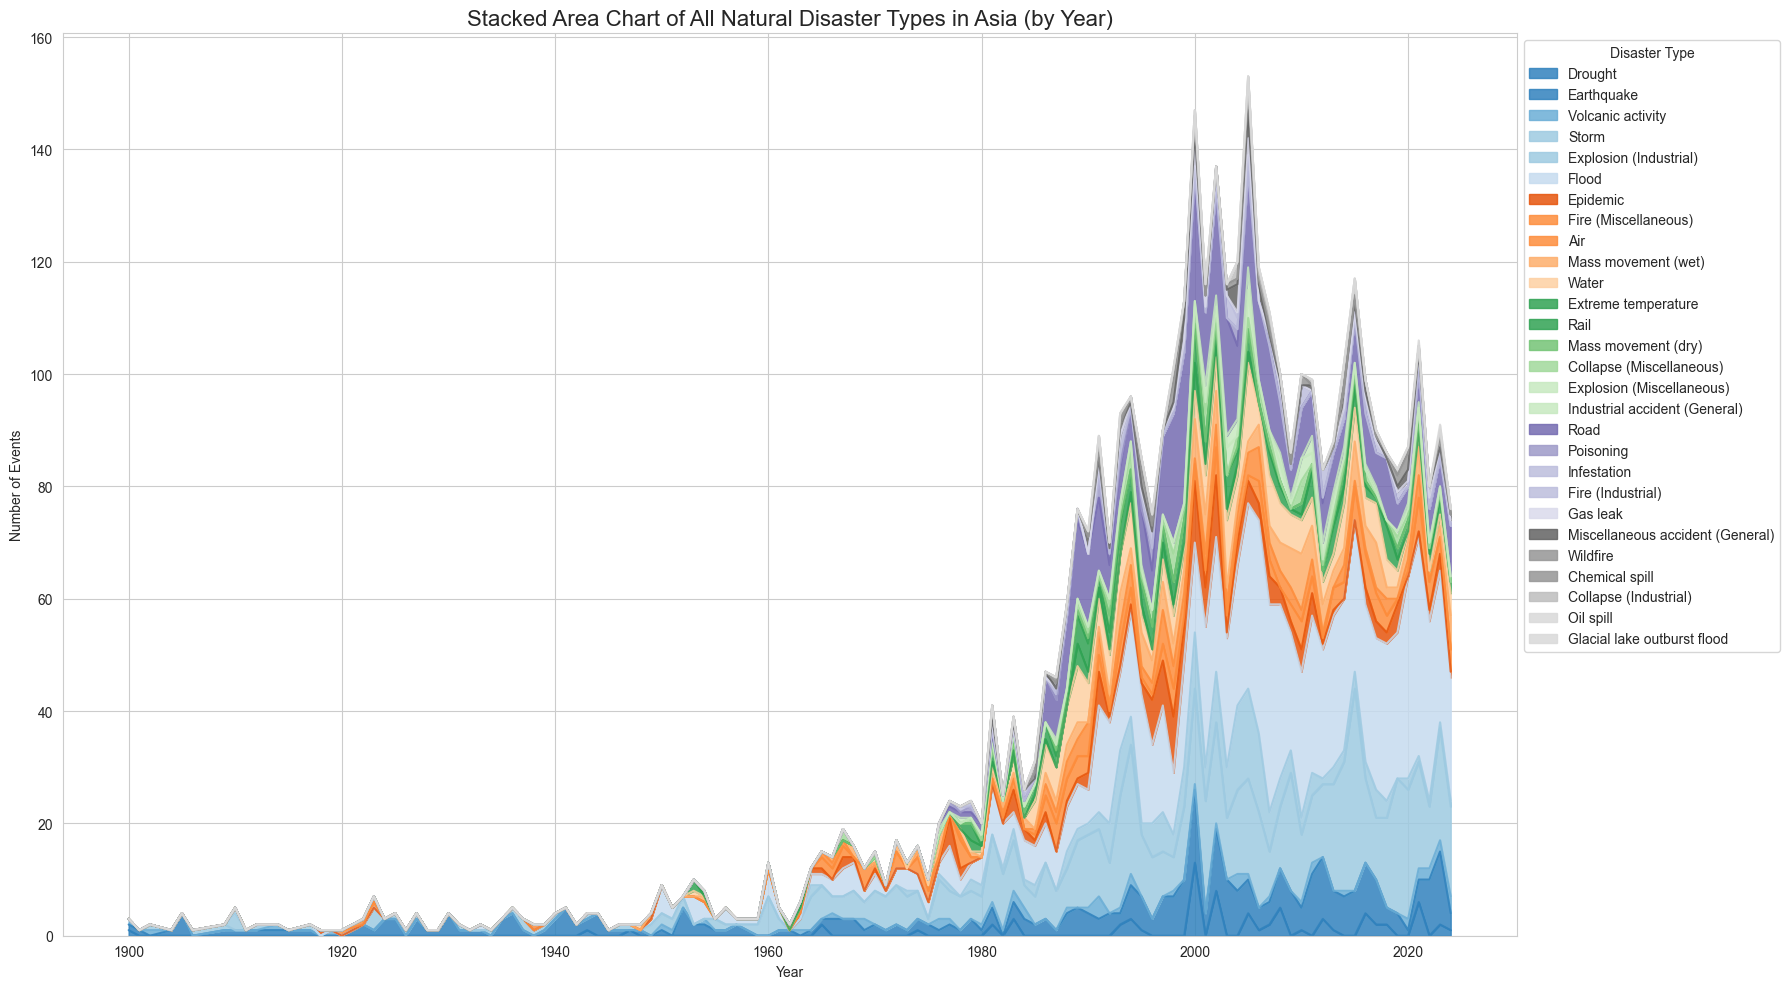

In [34]:
# Filter Asia-related disasters
asia_disasters = natural_disasters[natural_disasters['Region'] == 'Asia']

# Identify top 5 most frequent disaster types in Asia
top5_disasters_asia = asia_disasters['Disaster Type'].value_counts().head(5).index.tolist()

# --- Chart 1: Top 5 Natural Disasters in Asia (Stacked Area Chart) ---
top5_asia = asia_disasters[asia_disasters['Disaster Type'].isin(top5_disasters_asia)]
disasters_top5_asia_year = top5_asia.groupby(['Year', 'Disaster Type']).size().unstack(fill_value=0)

plt.figure(figsize=(16, 8))
disasters_top5_asia_year.plot.area(
    ax=plt.gca(),
    colormap='Set3',
    alpha=0.85
)
plt.title('Stacked Area Chart of Top 5 Natural Disaster Types in Asia', fontsize=16)
plt.xlabel('Year')
plt.ylabel('Number of Events')
plt.legend(title='Disaster Type', loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()

# --- Chart 2: All Natural Disasters in Asia (Stacked Area Chart) ---
disasters_all_asia_year = asia_disasters.groupby(['Year', 'Disaster Type']).size().unstack(fill_value=0)

plt.figure(figsize=(18, 10))
disasters_all_asia_year.plot.area(
    ax=plt.gca(),
    colormap='tab20c',
    alpha=0.85
)
plt.title('Stacked Area Chart of All Natural Disaster Types in Asia (by Year)', fontsize=16)
plt.xlabel('Year')
plt.ylabel('Number of Events')
plt.legend(title='Disaster Type', loc='upper left', bbox_to_anchor=(1.0, 1.0))
plt.grid(True)
plt.tight_layout()
plt.show()


In [35]:
# Filter for Africa
africa_disasters = disasters[disasters['Region'] == 'Africa'].dropna(subset=['Latitude', 'Longitude'])

fig = px.scatter_geo(
    africa_disasters,
    lat='Latitude',
    lon='Longitude',
    color='Disaster Type',
    title='Natural Disasters and Common Crane Migration (Africa)',
    opacity=0.5,
    template='plotly_white',
    scope='africa'
)

fig.add_scattergeo(
    lat=cranes['Latitude'],
    lon=cranes['Longitude'],
    mode='markers',
    marker=dict(size=2, color='black'),
    name='Crane Migration Path'
)

fig.update_geos(showcountries=True, showcoastlines=True, showland=True)
fig.show()

NameError: name 'disasters' is not defined